In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

#ABCD ray trace function
def ABCD_trace(a,zf, zf_type):
    #a: starting vector a=np.array([[height],[angle]])
    #zf: free space and lens focal lengths
    #zf_type: type of optical element ('z' for free space, 'f' for lens)
    #return matrix of y, z

    #check to make sure the passed arrays match in length
    if np.size(zf) != len(zf_type):
        print("zf and zf_type arrays do not match")
        return None

    trace=np.array([[a[0,0]], [0]])
    for ind in range(len(zf_type)):

        if zf_type[ind] == 'z':
            #free space propagation
            M1 = np.array([[1.0, zf[ind]], [0.0, 1.0]])
            a=M1@a
            #add new point to trace matrix
            y=a[0,0]
            z=trace[1, -1]+zf[ind]
            new_point = np.array([[y], 
                                  [z]])
            # Append column-wise
            trace = np.hstack((trace, new_point))
            
        elif zf_type[ind] == 'f':
            #free space propagation
            M1 = np.array([[1.0, 0.0], [-1/zf[ind], 1.0]])
            a=M1@a
            #Don't append to the trace
            #No ray travel

        else:
            print("Invalid zf_type")
            return None
    return trace

#function to plot lenses
def plt_lens(zf, zf_type, D):
    pos=0
    no_lens=0
    for index, item_type in enumerate(zf_type):
        if item_type=='z':
            pos=pos+zf[index]
            no_lens=no_lens+1
        else:
            if np.isscalar(D):
                plt.plot([pos,pos], [-D,D],'k')
            else:
                plt.plot([pos,pos], [-D[no_lens],D[no_lens]],'k')

## Depth of field/focus
Definition: The tolerance range of the image plane position where the image remains acceptably sharp.

- **depth of field:** measured in object space
- **depth of focus:** measured in image space

What change in object distance will remain on a pixel?

When the camera is in focus, the point in object space makes a perfect point on the CCD.  An object at a different distance creates an image at a shifted location.  At the CCD the new object creates a disc.  If the disc lies on the pixel then the images does not blur.

Here is the plot of the rays from an object to the CCD.

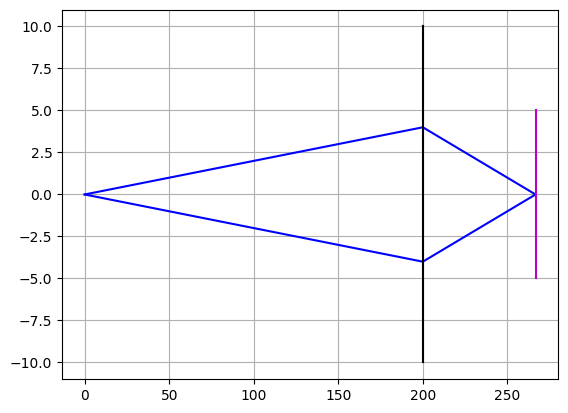

In [2]:
f1=50
So1=200
Si1=1/(1/f1-1/So1)

th=0.02
a1=np.array([[0], [th]])
zf=np.array([So1, f1, Si1])  #free space and lens focal lengths
zf_type=['z', 'f', 'z']
trace=ABCD_trace(a1,zf, zf_type)
z1=trace[1,:]
y1=trace[0,:]
plt.plot(z1, y1, 'b')

a2=np.array([[0], [-th]])
zf=np.array([So1, f1, Si1])  #free space and lens focal lengths
zf_type=['z', 'f', 'z']
trace=ABCD_trace(a2,zf, zf_type)
z2=trace[1,:]
y2=trace[0,:]
plt.plot(z2, y2, 'b')

#CCD
plt.plot([So1+Si1, So1+Si1], [-5, 5],'m')

D=10
plt_lens(zf, zf_type, D)
#plt.xlim([00, 250])
#plt.ylim([-4,4])
plt.grid()
plt.show()


Look at an object that is farther away from the camera without changing the focus of the camera.

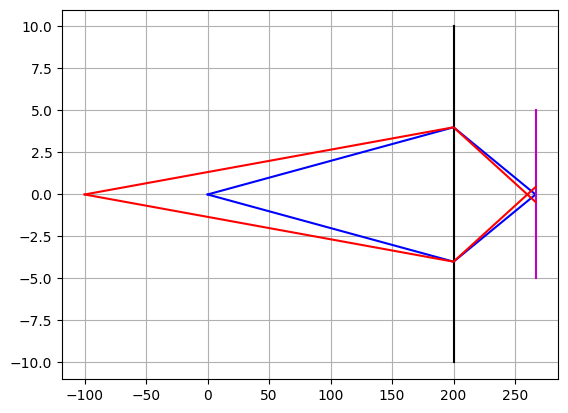

In [3]:
f1=50
So1=200
Si1=1/(1/f1-1/So1)

#original focus
th1=0.02
a1=np.array([[0], [th1]])
zf=np.array([So1, f1, Si1])  #free space and lens focal lengths
zf_type=['z', 'f', 'z']
trace=ABCD_trace(a1,zf, zf_type)
z1=trace[1,:]
y1=trace[0,:]
plt.plot(z1, y1, 'b')

a2=np.array([[0], [-th1]])
zf=np.array([So1, f1, Si1])  #free space and lens focal lengths
zf_type=['z', 'f', 'z']
trace=ABCD_trace(a2,zf, zf_type)
z2=trace[1,:]
y2=trace[0,:]
plt.plot(z2, y2, 'b')

#CCD
plt.plot([So1+Si1, So1+Si1], [-5, 5],'m')

D=10
plt_lens(zf, zf_type, D)

#new object without camera focusing
So2=300
Si2=1/(1/f1-1/So2)

th2=th1*So1/So2
a3=np.array([[0], [th2]])
zf=np.array([So2, f1, Si1])  #free space and lens focal lengths
zf_type=['z', 'f', 'z']
trace=ABCD_trace(a3,zf, zf_type)
z3=trace[1,:]+So1-So2
y3=trace[0,:]
plt.plot(z3, y3, 'r')

a4=np.array([[0], [-th2]])
zf=np.array([So2, f1, Si1])  #free space and lens focal lengths
zf_type=['z', 'f', 'z']
trace=ABCD_trace(a4,zf, zf_type)
z4=trace[1,:]+(So1-So2)
y4=trace[0,:]
plt.plot(z4, y4, 'r')

#plt.xlim([00, 250])
#plt.ylim([-4,4])
plt.grid()
plt.show()


Notice that the red trace comes to a focus before the CCD.  The result is that the object creates a disc of light on the CCD.  We want to calculate the size of the disc. Create a triangle for the rays from the new object to the focal plane.

<img src="DOF3.jpg" width="500">

We have equivalent triangles.  

$\frac{\frac{D}{2}}{Si2}=\frac{\frac{\rho}{2}}{Si1-Si2}$

$(D)(Si1-Si2)=(\rho)(Si2)$

$Si2(D+\rho)=D*Si1$

The farthest image that is in focus, meaning that all of the light stays on the same pixel is given by

$Si2=Si1*\frac{D}{D+\rho}$

The Depth of Focus is $DOF=Si2-Si1$ or

$DOF=Si1*\frac{D}{D+\rho}-Si1$

$DOF=Si1 \left(\frac{D-D-\rho}{D+\rho}\right)$

$DOF=-Si1 \left(\frac{\rho}{D+\rho}\right)$



The Depth of Field is the conversion of $Si2$ back to $So2$.

**Example:** Cannon PowerShot S200 has a CCD with 3648x2736 pixels and a size of 7.44mmx5.58mm, resulting in a pixel size of $\rho=2 \mu m$.  It has a focal range of $5.2mm < f < 26mm$. It has an aperture range of f/2 to f/5.9.  Make a plot of the depth of field for the case of EFL=26mm and the aperture is set to f/2 and f/5.9.

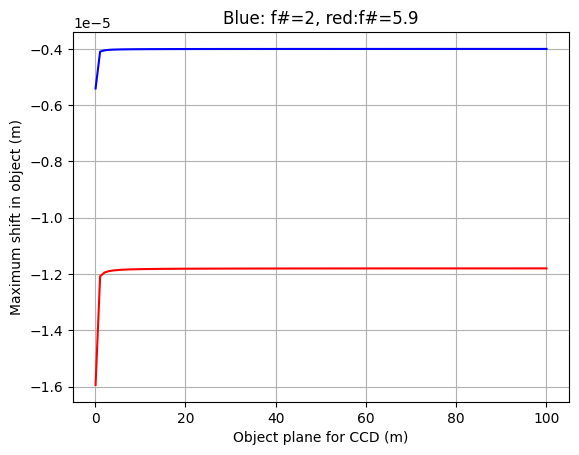

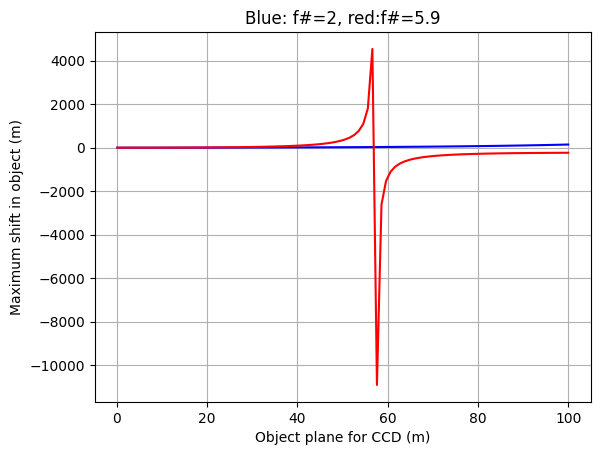

In [4]:
#Basic parameters
p=2e-6
EFL=26e-3

#Sweep through a range of object distances.  This is the point where the CCD is focused.
#The object distance needs to be greater than the focal length.
So1=np.linspace(.1, 100, num=100)
Si1=1/(1/EFL-1/So1)  #This is the focus position

#Let's look at the two f#
# f#=2
fno1=2
D1=EFL/fno1

# The farthest image that is clear is 
Si2A=Si1*D1/(D1+p)

# This is the depth of focus
# Meaning the clear range on the image side
# The Depth of Field is more valuable
# because it tells you the range of objects that are clear
#convert back to object space
So2A=1/(1/EFL-1/Si2A)

#Now do the calculation for the larger f#
fno2=5.9
D2=EFL/fno2

# The farthest image that is clear is 
Si2B=Si1*D2/(D2+p)
So2B=1/(1/EFL-1/Si2B)

plt.plot(So1, Si2A-Si1,'b')
plt.plot(So1, Si2B-Si1,'r')
plt.xlabel('Object plane for CCD (m)')
plt.ylabel('Maximum shift in object (m)')
plt.grid()
plt.title('Blue: f#=2, red:f#=5.9')
plt.show()

plt.plot(So1, So2A-So1,'b')
plt.plot(So1, So2B-So1,'r')
plt.xlabel('Object plane for CCD (m)')
plt.ylabel('Maximum shift in object (m)')
plt.grid()
plt.title('Blue: f#=2, red:f#=5.9')
plt.show()


What is going on?  How can we have a **negative object distance**?  If maximum allowable shift in the image location is large enough then $Si$ might be less that the focal length.  This results in 

$\frac{1}{So}=\frac{1}{f}-\frac{1}{Si}$

$\frac{1}{So}<0$ This means that the allowable object distance that stay in focus is greater than infinity.  Greater than infinity swaps the sign to become a virtual image.  This is unrealistic, so any negative values need to be replace with just a large object distance.

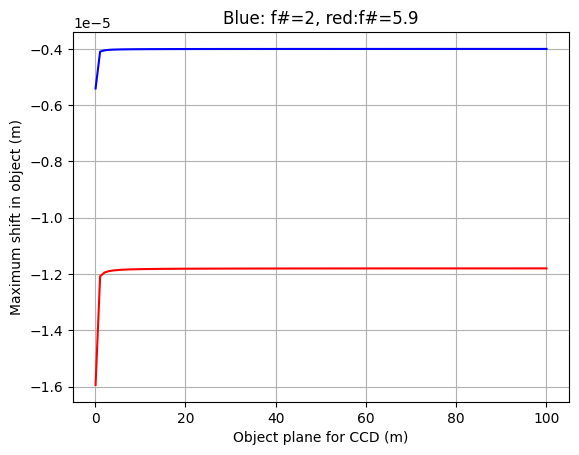

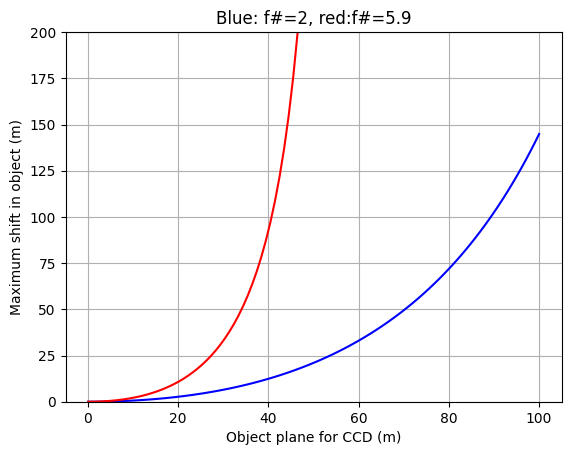

In [5]:
p=2e-6
EFL=26e-3

So1=np.linspace(.1, 100, num=100)
Si1=1/(1/EFL-1/So1)  #This is the focus position

#Let's look at the two f#
fno1=2
D1=EFL/fno1

# The farthest image that is clear is 
Si2A=Si1*D1/(D1+p)

# This is the depth of focus
# Meaning the clear range on the image side
# The Depth of Field is more valuable
# because it tell you the range of objects that are clear
#convert back to object space
So2A=1/(1/EFL-1/Si2A)

#If the range for of the image is large enough then it will always be in focus
#In this case set the object to a large number
So2A = np.where(So2A<0, 10000, So2A)

fno2=5.9
D2=EFL/fno2

# The farthest image that is clear is 
Si2B=Si1*D2/(D2+p)
So2B=1/(1/EFL-1/Si2B)
So2B = np.where(So2B<0, 10000, So2B)

plt.plot(So1, Si2A-Si1,'b')
plt.plot(So1, Si2B-Si1,'r')
plt.xlabel('Object plane for CCD (m)')
plt.ylabel('Maximum shift in object (m)')
plt.grid()
plt.title('Blue: f#=2, red:f#=5.9')
plt.show()

plt.plot(So1, So2A-So1,'b')
plt.plot(So1, So2B-So1,'r')
plt.xlabel('Object plane for CCD (m)')
plt.ylabel('Maximum shift in object (m)')
plt.ylim([0, 200])
plt.grid()
plt.title('Blue: f#=2, red:f#=5.9')
plt.show()


Look at an object that is closer to the camera without changing the focus of the camera.

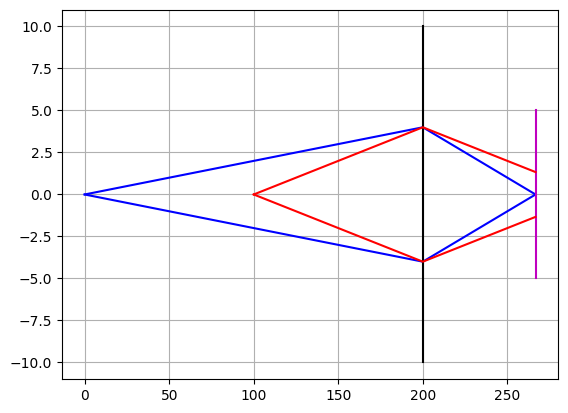

In [6]:
f1=50
So1=200
Si1=1/(1/f1-1/So1)

#original focus
th1=0.02
a1=np.array([[0], [th1]])
zf=np.array([So1, f1, Si1])  #free space and lens focal lengths
zf_type=['z', 'f', 'z']
trace=ABCD_trace(a1,zf, zf_type)
z1=trace[1,:]
y1=trace[0,:]
plt.plot(z1, y1, 'b')

a2=np.array([[0], [-th1]])
zf=np.array([So1, f1, Si1])  #free space and lens focal lengths
zf_type=['z', 'f', 'z']
trace=ABCD_trace(a2,zf, zf_type)
z2=trace[1,:]
y2=trace[0,:]
plt.plot(z2, y2, 'b')

#CCD
plt.plot([So1+Si1, So1+Si1], [-5, 5],'m')

D=10
plt_lens(zf, zf_type, D)

#new object without camera focusing
So2=100
Si2=1/(1/f1-1/So2)

th2=th1*So1/So2
a3=np.array([[0], [th2]])
zf=np.array([So2, f1, Si1])  #free space and lens focal lengths
zf_type=['z', 'f', 'z']
trace=ABCD_trace(a3,zf, zf_type)
z3=trace[1,:]+So1-So2
y3=trace[0,:]
plt.plot(z3, y3, 'r')

a4=np.array([[0], [-th2]])
zf=np.array([So2, f1, Si1])  #free space and lens focal lengths
zf_type=['z', 'f', 'z']
trace=ABCD_trace(a4,zf, zf_type)
z4=trace[1,:]+(So1-So2)
y4=trace[0,:]
plt.plot(z4, y4, 'r')

#plt.xlim([00, 250])
#plt.ylim([-4,4])
plt.grid()
plt.show()


The focus is now past the CCD making a disc on the CCD pixel.  We want to calculate the size of the disc. Create a triangle for the rays from the new object to the focal plane.

<img src="DOF4.jpg" width="500">

We have equivalent triangles.  

$\frac{\frac{D}{2}}{Si3}=\frac{\frac{\rho}{2}}{Si3-Si1}$

$(D)(Si3-Si1)=(\rho)(Si3)$

$Si3(D-\rho)=D*Si1$

$Si3=Si1*\frac{D}{D-\rho}$

**Example:** Cannon PowerShot S200 has a CCD with 3648x2736 pixels and a size of 7.44mmx5.58mm, resulting in a pixel size of $\rho=2 \mu m$.  It has a focal range of $5.2mm < f < 26mm$. It has an aperture range of f/2 to f/5.9.  Make a plot of the depth of focus for the case of EFL=26mm and the aperture is set at f/2.

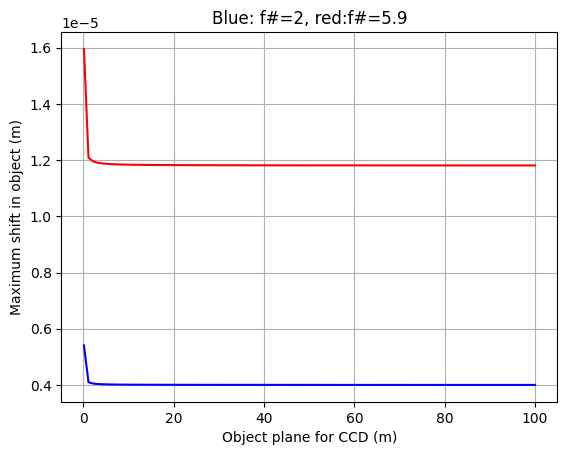

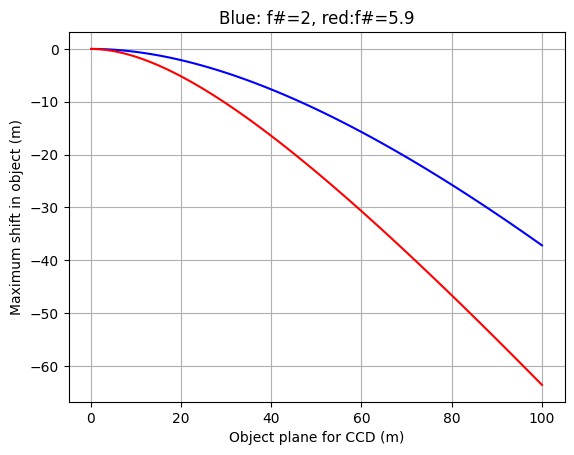

In [7]:
p=2e-6
EFL=26e-3

So1=np.linspace(.1, 100, num=100)
Si1=1/(1/EFL-1/So1)  #This is the focus position

#Let's look at the two f#
fno1=2
D1=EFL/fno1

# The farthest image that is clear is 
Si3A=Si1*D1/(D1-p)

# This is the depth of focus
# Meaning the clear range on the image side
# The Depth of Field is more valuable
# because it tell you the range of objects that are clear
#convert back to object space
So3A=1/(1/EFL-1/Si3A)

#If the range for of the image is large enough then it will always be in focus
#In this case set the object to a large number
So3A = np.where(So3A<0, 10000, So3A)

fno2=5.9
D2=EFL/fno2

# The farthest image that is clear is 
Si3B=Si1*D2/(D2-p)
So3B=1/(1/EFL-1/Si3B)
So3B = np.where(So3B<0, 10000, So3B)

plt.plot(So1, Si3A-Si1,'b')
plt.plot(So1, Si3B-Si1,'r')
plt.xlabel('Object plane for CCD (m)')
plt.ylabel('Maximum shift in object (m)')
plt.grid()
plt.title('Blue: f#=2, red:f#=5.9')
plt.show()

plt.plot(So1, So3A-So1,'b')
plt.plot(So1, So3B-So1,'r')
plt.xlabel('Object plane for CCD (m)')
plt.ylabel('Maximum shift in object (m)')
#plt.ylim([0, 200])
plt.grid()
plt.title('Blue: f#=2, red:f#=5.9')
plt.show()


Putting is all together: At a paricular object location there is a distance before the object and a distance after the image that sty in focus.

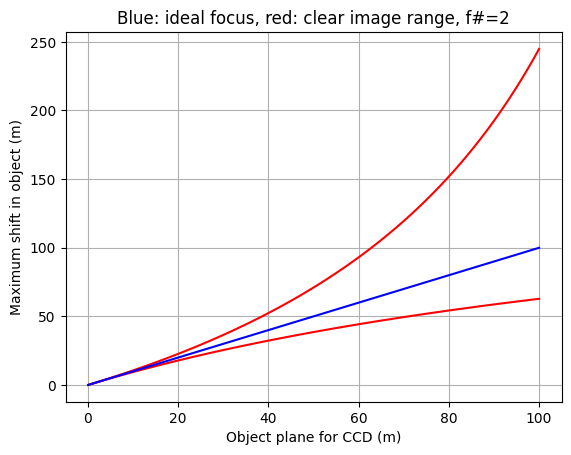

In [8]:
p=2e-6
EFL=26e-3

So1=np.linspace(.1, 100, num=100)
Si1=1/(1/EFL-1/So1)  #This is the focus position

#Let's look at the two f#
fno1=2
D1=EFL/fno1

#range of image distances
Si2A=Si1*D1/(D1+p)
Si3A=Si1*D1/(D1-p)

# This is the depth of focus
# Meaning the clear range on the image side
# The Depth of Field is more valuable
# because it tell you the range of objects that are clear
#convert back to object space
So2A=1/(1/EFL-1/Si2A)
So3A=1/(1/EFL-1/Si3A)

#If the range for of the image is large enough then it will always be in focus
#In this case set the object to a large number
So2A = np.where(So2A<0, 10000, So2A)
So3A = np.where(So3A<0, 10000, So3A)

plt.plot(So1, So2A,'r')
plt.plot(So1, So3A,'r')
plt.plot(So1, So1,'b')

plt.xlabel('Object plane for CCD (m)')
plt.ylabel('Maximum shift in object (m)')
#plt.ylim([0, 200])
plt.grid()
plt.title('Blue: ideal focus, red: clear image range, f#=2')
plt.show()


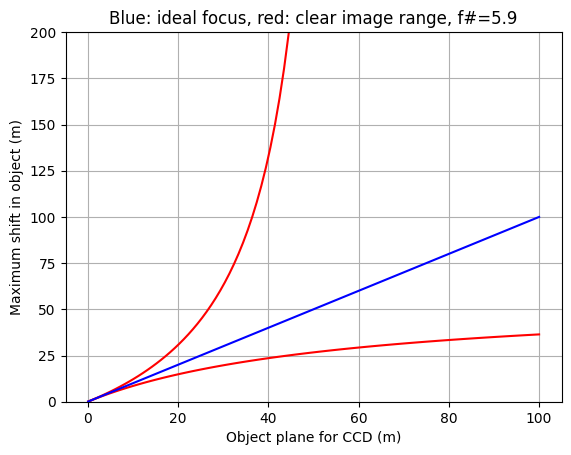

In [9]:
#Repeat for larger f#
p=2e-6
EFL=26e-3

So1=np.linspace(.1, 100, num=100)
Si1=1/(1/EFL-1/So1)  #This is the focus position

fno1=5.9
D1=EFL/fno1

#range of image distances
Si2A=Si1*D1/(D1+p)
Si3A=Si1*D1/(D1-p)

# This is the depth of focus
# Meaning the clear range on the image side
# The Depth of Field is more valuable
# because it tell you the range of objects that are clear
#convert back to object space
So2A=1/(1/EFL-1/Si2A)
So3A=1/(1/EFL-1/Si3A)

#If the range for of the image is large enough then it will always be in focus
#In this case set the object to a large number
So2A = np.where(So2A<0, 10000, So2A)
So3A = np.where(So3A<0, 10000, So3A)

plt.plot(So1, So2A,'r')
plt.plot(So1, So3A,'r')
plt.plot(So1, So1,'b')

plt.xlabel('Object plane for CCD (m)')
plt.ylabel('Maximum shift in object (m)')
plt.ylim([0, 200])
plt.grid()
plt.title('Blue: ideal focus, red: clear image range, f#=5.9')
plt.show()


**Conclusions**
- The closer the object is the focal length the smaller the Depth of Field
- The larger the f# (smaller aperture) the larger the Depth of Field

## Implication

Smaller Aperture (larger f#):
- Less light -> requires longer shutter -> Motion blur
- Larger Field of View

Larger Aperture (smaller f#)
- more light -> less motion blur
- Smaller Field of View


<img src="depth_field.jpg" width="500">

- Left: With the small aperture and long exposure the entire picture is in focus but there is lots of motion blur.
- Right: With a large aperture and short exposure there is less motion blur but the back ground is blurry.

<div style="border:4px solid red">

**HW1:**  In order to take a picture of a dragon fly, the camera has a super-telephoto lens with a focal length of f=400mm.  Here is the picture. This picture has the wings in focus (i.e no motion blur) but the background is blurry. 

<img src="dragon2.jpg" width="500">

The aperture is f/5 and the object distance is 2.9m. The camera has 20.4 magapixels and a sensor size of 16.4mm x 13mm.   What is the near distance that is clear? Variable name hw1.

In [10]:
f = 400
F = 5
D = f / F

sensor_area = 16.4 * 13
pixels = 20.4e6
pixel_area = sensor_area / pixels
pixel_pitch = math.sqrt(pixel_area)

so = 2.9e3
si = 1 / (1/f - 1/so)

si_far = si * D / (D + pixel_pitch)
si_near = si * D / (D - pixel_pitch)

so_near = 1 / (1/f - 1/si_near)
so_far = 1 / (1/f - 1/si_far)

print(f"Near limit of DOF: {so_near:.2f} mm")
print(f"Far limit of DOF: {so_far:.2f} mm")

hw1 = so_near / 1e3



Near limit of DOF: 2899.27 mm
Far limit of DOF: 2900.73 mm


<div style="border:4px solid red">

**HW2:** From the previous problem, what is the far distance that is clear?  Variable name hw2.

In [11]:
hw2 = so_far / 1e3

<div style="border:4px solid red">

**HW3:** In this image the back of the dragon fly is blurry. 

<img src="dragon3.jpg" width="500">

The depth of field is 20mm.  The camera has a focal length of f=400mm, a pixel size of $4 \mu m$, and a aperture with an f#=2. What is the object distance? Use variable hw3

In [12]:
N = 2
f = 400
rho = 4e-3
DOF = 20

so = np.sqrt((DOF * f**2)/(2 * N * rho))

print(f"Object distance for DOF of 20 mm: {so*1e-3:.2f} m")

hw3 = so / 1e3

Object distance for DOF of 20 mm: 14.14 m


<div style="border:4px solid red">

**HW4:** You are tasked with taking a picture of a small medical device created in a university research group.  You need the picture to be as close as possible.  You use the Sony FE 100 mm f/2.8 Macro GM OSS (Premium Full-Frame Macro Lens).  You use the camera with a focal length of f=100mm, and f/2.8.  You get the camera as close as is possible, which you find out is 0.26m.  The camera has a pixel size of $2 \mu m$.  What is the depth of field (defined as the maximum distance minus the minimum distance)?  Use variable name hw4.

In [13]:
f = 100
N = 2.8
so = 260
rho = 2e-3

si = 1 / (1/f - 1/so)

si_near = si * D / (D - rho)
si_far = si * D / (D + rho)

so_near = 1 / (1/f - 1/si_near)
so_far = 1 / (1/f - 1/si_far)

DOF = so_far - so_near

hw4 = DOF / 1e3 #DOF in mm
